# Young Adult Hardcover Fiction - NYT Bestsellers

In [ ]:
# NYT Developers Call Limit

# there are two rate limits per API: 4,000 requests per day and 10 requests per minute. 

# You should sleep 6 seconds between calls to avoid hitting the per minute rate limit.

In [ ]:
# Sign up for an API key here               https://developer.nytimes.com

In [1]:

import pandas as pd
import numpy as np

import requests

from datetime import timedelta, date

import time

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters

import seaborn as sns

import PIL.Image
from pylab import *
from wordcloud import WordCloud, STOPWORDS

import markovify


In [2]:
# ENTER YOUR OWN NYT DEVELOPER API KEY HERE


api_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'            # <------------------ ENTER API KEY HERE

In [3]:
# pull lists from nyt api

lists = requests.get('https://api.nytimes.com/svc/books/v3//lists/names.json?api-key=' + api_key)

print("Please show me 200...", lists.status_code)

     
# Wait for 70 seconds

time.sleep(70)

Please show me 200... 200


In [4]:
# put into dataframe

lists_data = lists.json()['results']
lists_data = pd.DataFrame.from_dict(lists_data)
lists_data

,list_name,display_name,list_name_encoded,oldest_published_date,newest_published_date,updated
0,Combined Print and E-Book Fiction,Combined Print & E-Book Fiction,combined-print-and-e-book-fiction,2011-02-13,2020-04-26,WEEKLY
1,Combined Print and E-Book Nonfiction,Combined Print & E-Book Nonfiction,combined-print-and-e-book-nonfiction,2011-02-13,2020-04-26,WEEKLY
2,Hardcover Fiction,Hardcover Fiction,hardcover-fiction,2008-06-08,2020-04-26,WEEKLY
3,Hardcover Nonfiction,Hardcover Nonfiction,hardcover-nonfiction,2008-06-08,2020-04-26,WEEKLY
4,Trade Fiction Paperback,Paperback Trade Fiction,trade-fiction-paperback,2008-06-08,2020-04-26,WEEKLY
5,Mass Market Paperback,Paperback Mass-Market Fiction,mass-market-paperback,2008-06-08,2017-01-29,WEEKLY
6,Paperback Nonfiction,Paperback Nonfiction,paperback-nonfiction,2008-06-08,2020-04-26,WEEKLY
7,E-Book Fiction,E-Book Fiction,e-book-fiction,2011-02-13,2017-01-29,WEEKLY
8,E-Book Nonfiction,E-Book Nonfiction,e-book-nonfiction,2011-02-13,2017-01-29,WEEKLY
9,Hardcover Advice,Hardcover Advice & Misc.,hardcover-advice,2008-06-08,2013-04-21,WEEKLY


In [5]:
# get a list of dates... enter relevant dates into start_date and stop_date variable

from datetime import timedelta, date


dates = []

start_date = date(2015, 8, 30)                    # <------------------ ENTER START DATE HERE
end_date = date(2020, 4, 22)                       # <------------------ ENTER END DATE HERE

delta = timedelta(days=7)

while start_date <= end_date:
    
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


In [6]:
# group dates into chunks of 10 for the api call size    (maximum is 10 a minute, 4000 a day)


def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))


chunks = []

for group in chunker(dates, 10):
   
    chunks.append(group)
 
    

In [7]:
# type in the name of the best sellers list you wish to query and make sure to type it in correctly 
# you can find all options from the 'list_name_encoded' column in the 'list' dataframe above
# however please choose only the lists that are updated WEEKLY as that is how I set up the code


list_name = 'young-adult-hardcover'       # <------------------ ENTER LIST NAME HERE

In [8]:
# api call create and append dataframe


api_url_start = 'https://api.nytimes.com/svc/books/v3/lists/'       # generate generic api url
api_url_end = ('/' + list_name  + '.json?api-key=')                 # add in list name



genre_df = pd.DataFrame()                                           # create empty dataframe


for chunk in chunks:                                                # pull 10 dates at a time from total dates
    
    
    for date in chunk:                                              # pull one date at a time from the 10
    
        url = (api_url_start +  date   + api_url_end)               # put togehter api url parts
        response = requests.get(url + api_key)                      # pull from api with key
    
        genre = response.json()                                     # create variable for json file
        genre = pd.DataFrame.from_dict(genre)                       # create dataframe from json file 
        
        books_df = pd.DataFrame.from_dict(genre.iloc[1,4])          # select only book info from dataframe
        
        books_df['bestsellers-date'] = genre.iloc[9,4]              # create and join column for bestsellers dates
        
        genre_df = genre_df.append(books_df, ignore_index=True, sort=True)      # append books to dataframe

            
        
        # select only relevant columns add bestsellers date (you may wish to add or delete some)  

        genre_df = genre_df[['bestsellers-date', 'author', 'description', 'price', 'publisher', 'rank', 'rank_last_week', 'title', 'weeks_on_list' ]]
    
    
    
# Wait for 70 seconds to not max out the api call limit  ...and repeat for the next 10 dates

    time.sleep(70)


# show dataframe    

genre_df


,bestsellers-date,author,description,price,publisher,rank,rank_last_week,title,weeks_on_list
0,2015-08-30,Rainbow Rowell,The world opposes the love of two outcast teen...,0,St. Martin's Griffin,1,0,ELEANOR AND PARK,1
1,2015-08-30,Colleen Houck,A teenager helps a resurrected Egyptian prince...,0,Delacorte,2,0,REAWAKENED,1
2,2015-08-30,Victoria Aveyard,A girl with a special power lives in a kingdom...,0,HarperTeen,3,0,RED QUEEN,1
3,2015-08-30,Tommy Wallach,An asteroid disrupts the lives of a group of h...,0,Simon & Schuster,4,0,WE ALL LOOKED UP,1
4,2015-08-30,E Lockhart,Four friends decamp to a private island off Ma...,0,Delacorte,5,0,WE WERE LIARS,1
...,...,...,...,...,...,...,...,...,...
2425,2020-04-19,Angie Thomas,A 16-year-old girl sees a police officer kill ...,0,Balzer + Bray,6,6,THE HATE U GIVE,162
2426,2020-04-19,Jason Reynolds and Ibram X Kendi,An exploration of racism and anti-racism in Am...,0,"Little, Brown",7,8,STAMPED,4
2427,2020-04-19,Holly Jackson,While trying to solve a murder-suicide case fo...,0,Delacorte,8,7,A GOOD GIRL'S GUIDE TO MURDER,9
2428,2020-04-19,Tomi Adeyemi,Zélie fights to restore magic to the land of O...,0,Holt,9,9,CHILDREN OF BLOOD AND BONE,109


In [9]:
# save dateframe to csv file  (UNHASH THE LINE)

# genre_df.to_csv('young_adult_hardcover_fiction.csv')

genre_df = pd.read_csv('young_adult_hardcover_fiction.csv')
        

In [10]:
# rank and plot the most popular book titles by weeks on the list 

popular = genre_df['title'].value_counts()

popular = pd.DataFrame(popular).reset_index()

popular = popular.rename(columns={"index": "title", "title": "count"})

popular = popular.loc[popular['count']>=52]

popular

,title,count
0,THE HATE U GIVE,162
1,ONE OF US IS LYING,115
2,CHILDREN OF BLOOD AND BONE,109
3,THIS IS WHERE IT ENDS,72
4,FIVE FEET APART,70
5,TURTLES ALL THE WAY DOWN,62
6,LADY MIDNIGHT,56
7,"EVERYTHING, EVERYTHING",53
8,SIX OF CROWS,52


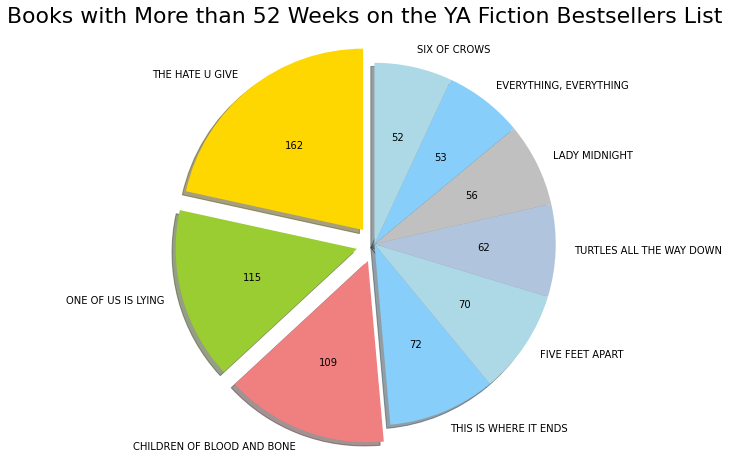

In [14]:
# Data to plot... (make sure explode has same number of elements as your popular list)

labels = popular['title']
sizes = popular['count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightblue','lightsteelblue','silver',  'lightskyblue', 'lightblue']
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(8, 8))

# show values instead of percentages
def absolute_value(val):
    a  = sizes[ np.abs(sizes - val/100.*sizes.sum()).idxmin() ]
    return a


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct=absolute_value, shadow=True, startangle=90)


plt.axis('equal')
plt.title('Books with More than 52 Weeks on the YA Fiction Bestsellers List', fontsize=22)
plt.show()

In [15]:
# rank and plot the most popular book authors by weeks on the list 

popular = genre_df['author'].value_counts()

popular = pd.DataFrame(popular).reset_index()

popular = popular.rename(columns={"index": "author", "author": "count"})

popular = popular.loc[popular['count']>=52]

popular

,author,count
0,Angie Thomas,197
1,Karen M McManus,143
2,Tomi Adeyemi,127
3,Rainbow Rowell,111
4,Leigh Bardugo,98
5,Nicola Yoon,95
6,Cassandra Clare,81
7,Victoria Aveyard,81
8,Marieke Nijkamp,77
9,Rachael Lippincott with Mikki Daughtry and Tob...,70


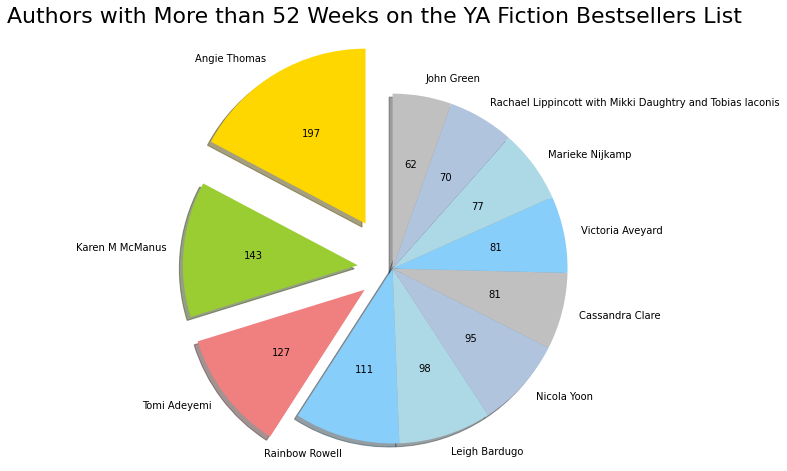

In [17]:
# Data to plot... (make sure explode has same number of elements as your popular list)

labels = popular['author']
sizes = popular['count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightblue','lightsteelblue','silver', 'lightskyblue', 'lightblue','lightsteelblue','silver']
explode = (0.3, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(8, 8))

# show values instead of percentages
def absolute_value(val):
    a  = sizes[ np.abs(sizes - val/100.*sizes.sum()).idxmin() ]
    return a


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct=absolute_value, shadow=True, startangle=90)


plt.axis('equal')
plt.title('Authors with More than 52 Weeks on the YA Fiction Bestsellers List', fontsize=22)
plt.show()

In [18]:
# drop duplicate titles and keep the first occurance 
# (sometimes books get republished and the descriptions get updated so we want the first editions)

titles = genre_df.drop_duplicates(subset='title', keep='first')


In [19]:
# create wordbank from descriptions

wordbank = titles['description'].unique()

wordbank 

array(['The world opposes the love of two outcast teenagers.',
       'A teenager helps a resurrected Egyptian prince battle an evil god.',
       'A girl with a special power lives in a kingdom divided between an underclass with red blood and an elite with silver.',
       'An asteroid disrupts the lives of a group of high school seniors.',
       "Four friends decamp to a private island off Martha's Vineyard.",
       'A girl wonders if she can be in love with two boys at once.',
       'An outcast helps a classmate recover from her sister’s death.',
       'Cath, a writer of popular fan fiction, struggles during her freshman year at college.',
       'A girl meets a nurturing family after her brother goes to jail.',
       'Companions face a harsh choice in the follow-up to “The 5th Wave.”',
       'A girl’s love life goes from imaginary to out of control.',
       'A teenager doesn’t believe her best friend really killed herself.',
       'The Diviners try to save New York from a m

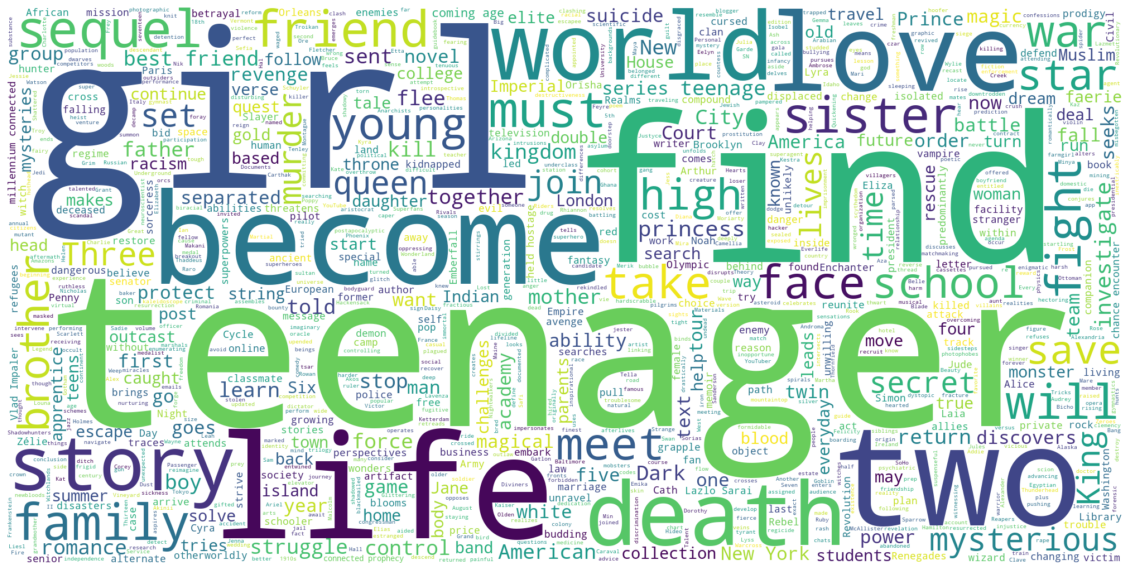

In [20]:
# build a word cloud

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

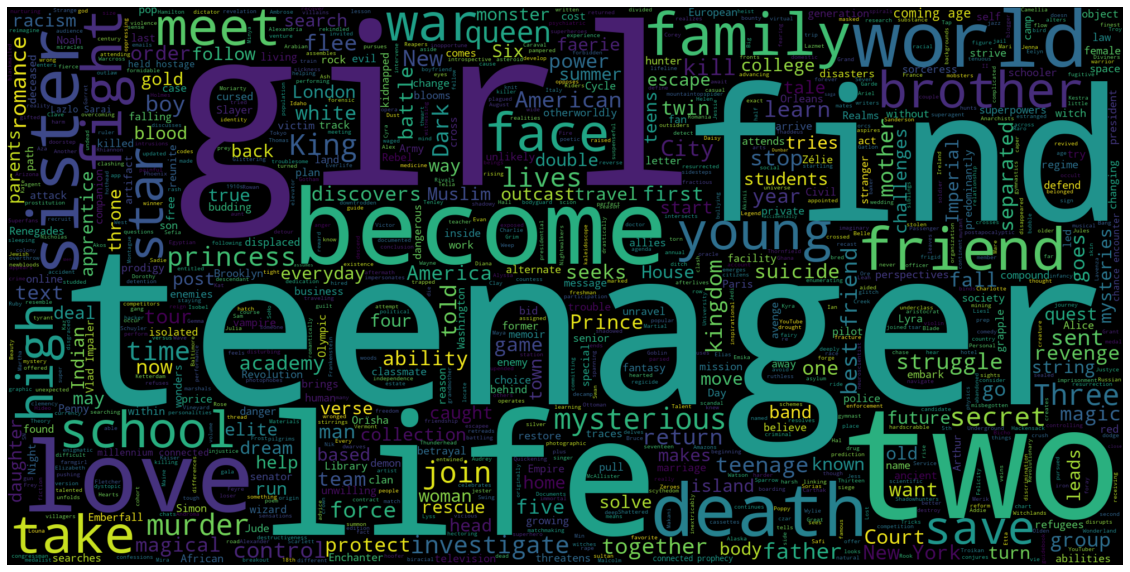

In [21]:
# add the uninteresting words to stopwords

stopwords.add('novel')
stopwords.add("series")
stopwords.add("book")
stopwords.add("author")
stopwords.add("writer")
stopwords.add("trilogy")
stopwords.add("stories")
stopwords.add("sequel")
stopwords.add("story")
stopwords.add("Originally published")
stopwords.add("installment")
stopwords.add("set")
stopwords.add("sets")
stopwords.add("Jane")
stopwords.add("continue")
stopwords.add("must")
stopwords.add("called")
stopwords.add("Vlad Impaler")
stopwords.add("will")
stopwords.add("Eliza")
stopwords.add("Orisha")
stopwords.add("Zelle")
stopwords.add("Cath")
stopwords.add("Cyra")
stopwords.add("Laia")



# re-generate the word cloud

wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Image downloaded and saved!


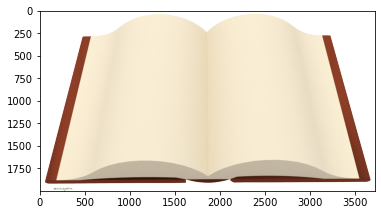

In [22]:
# download image and save mask to book

book = np.array(PIL.Image.open('book.png'))

imshow(book)

print('Image downloaded and saved!')

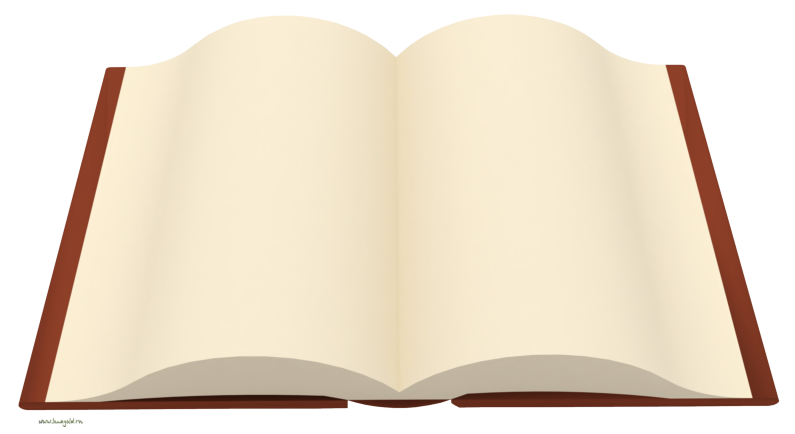

In [23]:
# display mask image

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(book, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

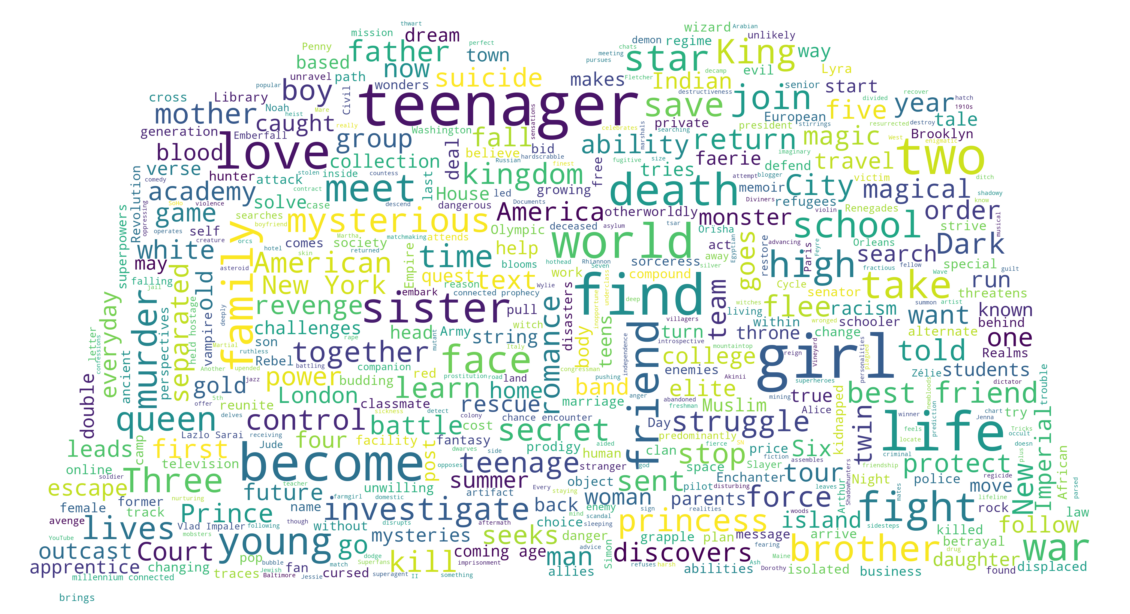

In [24]:
# instantiate a word cloud object
book_wc = WordCloud(background_color='white', max_words=500, mask=book, stopwords=stopwords)

# generate the word cloud
book_wc.generate(' '.join(str(word) for word in wordbank))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# Text Generation

In [25]:
df = pd.read_csv('young_adult_hardcover_fiction.csv')

In [26]:
df = df[['description']]

In [27]:
# df = df[['description']].drop_duplicates().reset_index(drop=True)

df


,description
0,The world opposes the love of two outcast teen...
1,A teenager helps a resurrected Egyptian prince...
2,A girl with a special power lives in a kingdom...
3,An asteroid disrupts the lives of a group of h...
4,Four friends decamp to a private island off Ma...
...,...
2425,A 16-year-old girl sees a police officer kill ...
2426,An exploration of racism and anti-racism in Am...
2427,While trying to solve a murder-suicide case fo...
2428,Zélie fights to restore magic to the land of O...


In [28]:
text = df['description'].str.lower()
text = text.str.replace('\d+', '')
text = text.astype('str')
text

0       the world opposes the love of two outcast teen...
1       a teenager helps a resurrected egyptian prince...
2       a girl with a special power lives in a kingdom...
3       an asteroid disrupts the lives of a group of h...
4       four friends decamp to a private island off ma...
                              ...                        
2425    a -year-old girl sees a police officer kill he...
2426    an exploration of racism and anti-racism in am...
2427    while trying to solve a murder-suicide case fo...
2428    zélie fights to restore magic to the land of o...
2429    romance blooms between two unlikely teens whil...
Name: description, Length: 2430, dtype: object

In [52]:
text_model_1 = markovify.NewlineText(text, state_size = 2)
text_model_2 = markovify.NewlineText(text, state_size = 2)
text_model_3 = markovify.NewlineText(text, state_size = 2)
text_model_4 = markovify.NewlineText(text, state_size = 2)
text_model_5 = markovify.NewlineText(text, state_size = 2)

In [53]:
model_combo = markovify.combine([ text_model_1, text_model_2, text_model_3, text_model_4, text_model_5 ], [1, 1,1, 1, 1])

# Print randomly-generated sentences using the built model

for idx, i in enumerate(range(10)):
    print('(',idx+1,')','   ', model_combo.make_sentence(tries=10000, max_overlap_ratio = 0.25, test_output= True))

( 1 )     rivals and allies struggle to define their place in a dystopic future, two girls separated by a millennium, are connected by a millennium, are connected by a millennium, are connected by a millennium, are connected by a rash act.
( 2 )     aza and daisy investigate a mystery with a special power lives in a society controlling its population, a girl with a special power lives in a society controlling its population, a girl in a war between the faerie courts and the universe.
( 3 )     bri strives to become a member of the amazons, saves a descendant of helen of troy and together they fight to the citizens of orleans, aspires to become a fighter pilot, but will her father's reputation stand in the martial empire, laia meets the cursed prince rhen, who will turn into a krell pilot training program disguised as an alien.
( 4 )     love with two refugees of her mother, a teenager leads a secret service agent's daughter and the search for the king in the series, moriarty joins holm